# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

This study analyzes a dataset from a Portuguese bank that implemented targeted marketing campaigns for a long-term deposit product. These campaigns primarily involved telephone calls from bank agents to clients, with occasional supplementary online banking interactions. Data was collected from 17 campaigns conducted between 2008 and 2010, encompassing 79,354 client contacts. A comprehensive set of customer attributes was recorded for each contact, including campaign outcomes (successful or unsuccessful). The overall success rate across all campaigns was 8% (6,499 successful outcomes)

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1522]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from scipy import stats
import calendar

In [1524]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [1526]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



To gain a deeper understanding of how key features impact the target variable, let's conduct an exploratory data analysis. To improve the visual clarity of our charts, we will rename the target variable. After reading the paper I think, we need to concentrate on features 1 through 7 for our initial model building phase.

### Preliminary Data Checking

3.1. Rename the column 'y' to 'deposit'
3.2. Then find unwanted columns, if any
3.3. Also find any  missing values and features with only one value

#### 3.1. Rename the column 'y' to 'deposit' since thats what it is refering to

In [1532]:
df.rename(columns = {'y':'deposit'}, inplace = True)

In [1534]:
df.shape

(41188, 21)

#### 3.2. Lets use Pandas to check for missing or NaN values in a DataFrame df

In [1537]:
df.isna().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
deposit           False
dtype: bool

#### 3.3. Also find any  missing values and features with only one value

In [1540]:
# Find missing values (NaN) in the DataFrame
missing_values = df.isna().sum()

# Find features with only one unique value
single_value_features = df.nunique()[df.nunique() == 1]

# Display the results
print("Missing Values in each column:")
print(missing_values)

print("\nFeatures with only one unique value:")
print(single_value_features)

Missing Values in each column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64

Features with only one unique value:
Series([], dtype: int64)


According to the features information, there are no unwanted columns in this dataset. 

#### 3.4 Exploratory Data Analysis (EDA)

In [1544]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


The description shows that:

The mean of age of potential clients is about 40 years, with the youngest is 17 years and the oldest is 98 years. The distribution seems reasonably wide, given the high standard deviation (10.42)

The duration of interactions exhibits significant variability, with a mean of 258.28 seconds and a high standard deviation of 259.28, ranging from 0 seconds, potentially indicating unsuccessful or extremely brief contacts, to an extreme of 4,918 seconds (approximately 82 minutes), which may suggest unusually prolonged interactions or data entry errors.

The mean value of 2.57 suggests that most clients are contacted 2 to 3 times in a campaign, with a max of 56. Could be an error which seems to be an outlier (extremely high frequency) may need to be excluded later on.

pdays (days since last contact) indicates the number of days since the last contact with a client. However, the majority of records have a value of 999, which typically represents clients who have not been previously contacted according to the database. 999 - may be commonly used as a placeholder for clients with no previous contact history.

In [1547]:
# Find numerical columns
numerical_features = df.select_dtypes(include=['number']).columns.tolist()

# Find categorical columns (both object and category types)
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Display the results
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Categorical Features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'deposit']


In [1549]:
# Let us now see how many category in each features
df.describe(include=['O']) 

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,deposit
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


Feature job and month have the highest unique value of categorical features. The dominant values like 'admin.' in job, 'married' in marital, and 'no' in deposit. Some features, such as default, housing, and loan, contain an 'unknown' category, indicating potential missing data that may need to be handled. The distribution of categories suggests possible skewness, which should be addressed during further analysis and modeling.

### 3.4.1 Distribution & Visualization of data

#### Let us check the data distribution of numerical features first

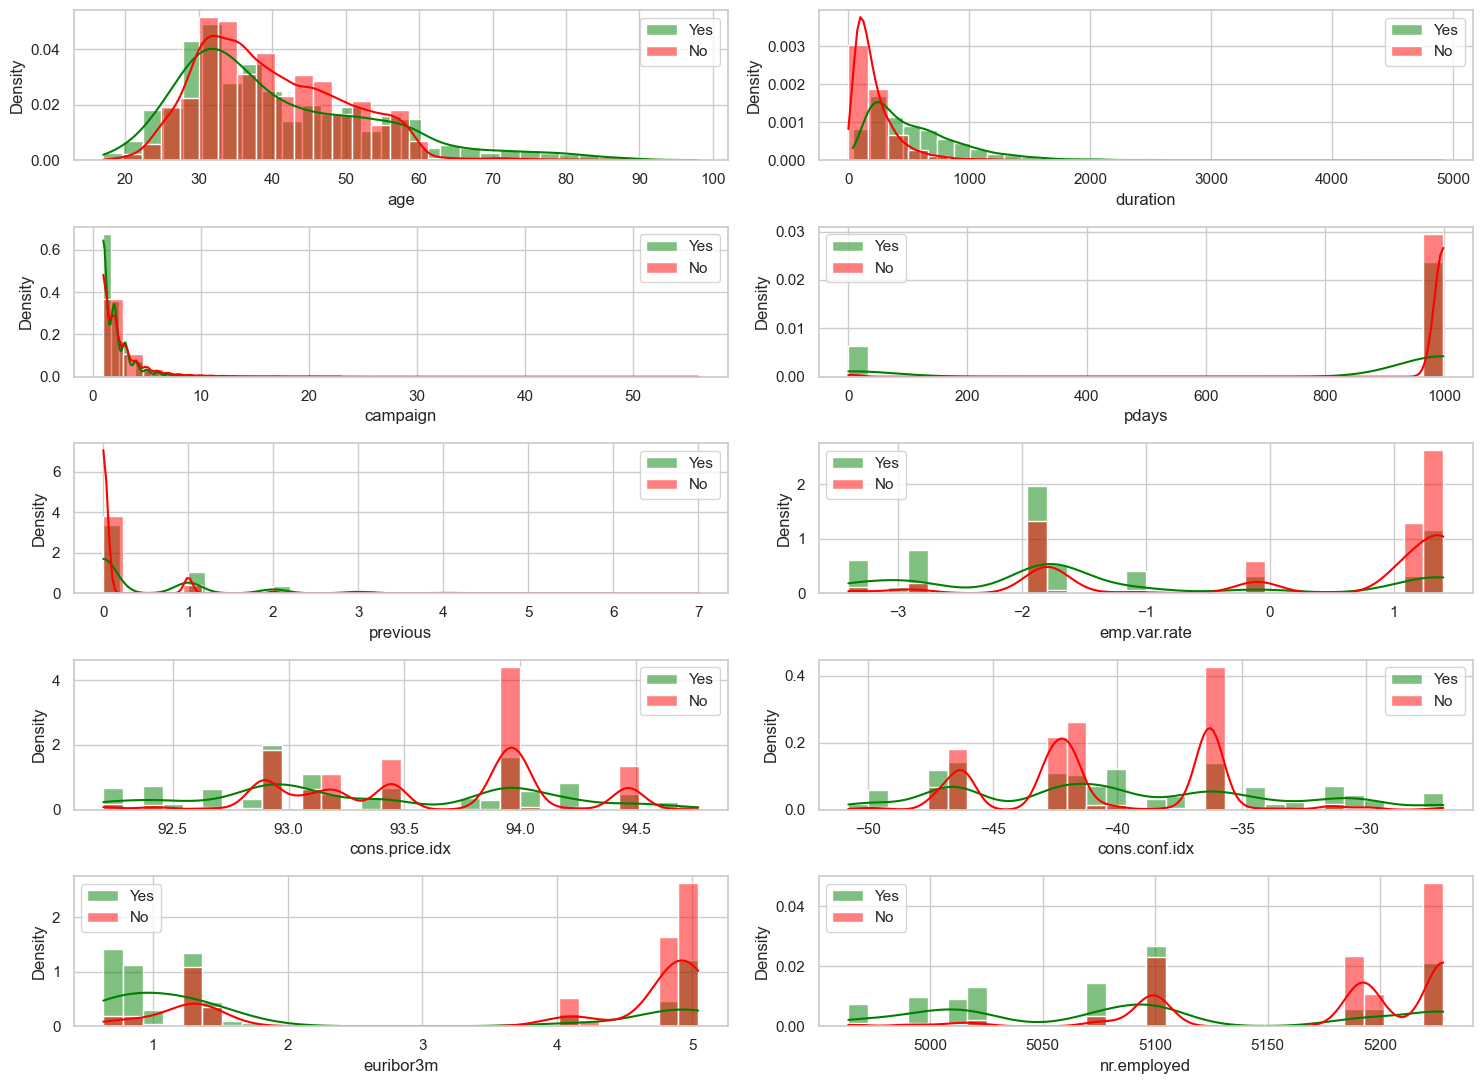

In [1554]:
# Set style and color palette
sns.set(style='whitegrid', palette='Set2')

# Create a mapping of numerical feature names to indices for subplot positioning
numerical_codes = {feature: i for i, feature in enumerate(numerical_features)}

# Initialize the plot
plt.figure(figsize=(15, 11))

# Plot distribution for each numerical feature, separated by deposit status
for feature, i in numerical_codes.items():
    plt.subplot(5, 2, i + 1)  
    sns.histplot(df.loc[df['deposit'] == 'yes', feature], kde=True, color='green', label='Yes', stat='density', bins=30)
    sns.histplot(df.loc[df['deposit'] == 'no', feature], kde=True, color='red', label='No', stat='density', bins=30)
    plt.legend()


plt.tight_layout()

# Show the plot
plt.show()

In [1555]:
# Set significance level for the test
alpha = 0.05

for num, feature in enumerate(numerical_features, 1):
    k2, p_value = stats.normaltest(df[feature])
   
    # Print the p-value for each feature
    print(f'{num}. p-value for {feature} = {p_value:.4f}')
    
    # Interpret the result
    if p_value < alpha:
        print(f"The null hypothesis for {feature} can be rejected (data is not normal).")
    else:
        print(f"The null hypothesis for {feature} cannot be rejected (data is normal).")
    
    print()  # Print a blank line 

1. p-value for age = 0.0000
The null hypothesis for age can be rejected (data is not normal).

2. p-value for duration = 0.0000
The null hypothesis for duration can be rejected (data is not normal).

3. p-value for campaign = 0.0000
The null hypothesis for campaign can be rejected (data is not normal).

4. p-value for pdays = 0.0000
The null hypothesis for pdays can be rejected (data is not normal).

5. p-value for previous = 0.0000
The null hypothesis for previous can be rejected (data is not normal).

6. p-value for emp.var.rate = 0.0000
The null hypothesis for emp.var.rate can be rejected (data is not normal).

7. p-value for cons.price.idx = 0.0000
The null hypothesis for cons.price.idx can be rejected (data is not normal).

8. p-value for cons.conf.idx = 0.0000
The null hypothesis for cons.conf.idx can be rejected (data is not normal).

9. p-value for euribor3m = 0.0000
The null hypothesis for euribor3m can be rejected (data is not normal).

10. p-value for nr.employed = 0.0000
Th

**Findings:**
- All numerical features in the dataset are non-normally distributed, and the null hypothesis of normality is rejected for each.

- This means we should consider alternative methods or transformations for handling the data

- We can see from the plot that 'age', 'duration', 'campaign', and 'previous' features are heavily skewed towards the left. Also  'campaign', and 'previous' seem to have some outliers.

- The majority of both acceptances and refusals of the subscription offer come from customers in their 30s.

A clear distinction exists between the 'yes' and 'no' categories in the **duration** feature. Generally, the longer the duration of the call, the higher the likelihood that a potential customer will subscribe to the term deposit.

Regarding the potential outliers in the three features mentioned, the following scenarios are possible:

- **pdays**: Contacting a lead after more than 1000 days is atypical, but still plausible. Sometimes, the customer might have been removed from the marketing list but later added back after showing renewed interest. It’s also possible that the system continued to track days even after the customer was removed, which would explain the unusually high values.
  
- **campaign**: Being contacted more than 30 times within a single marketing campaign seems unusual. It raises the question of why the marketing team continued to reach out so many times—did they not consider the customer uninterested? Most organizations likely wouldn’t persist this long without reconsidering the customer’s engagement. This warrants a deeper investigation to understand why so many contacts were made.
  
- **previous**: Outliers in this feature, with values over 5, could be reasonable if a potential customer was part of multiple marketing campaigns. In such cases, it's possible that the customer’s data was recorded across several campaigns, which may explain the high values

#### Let us check the data distribution of categorical features now

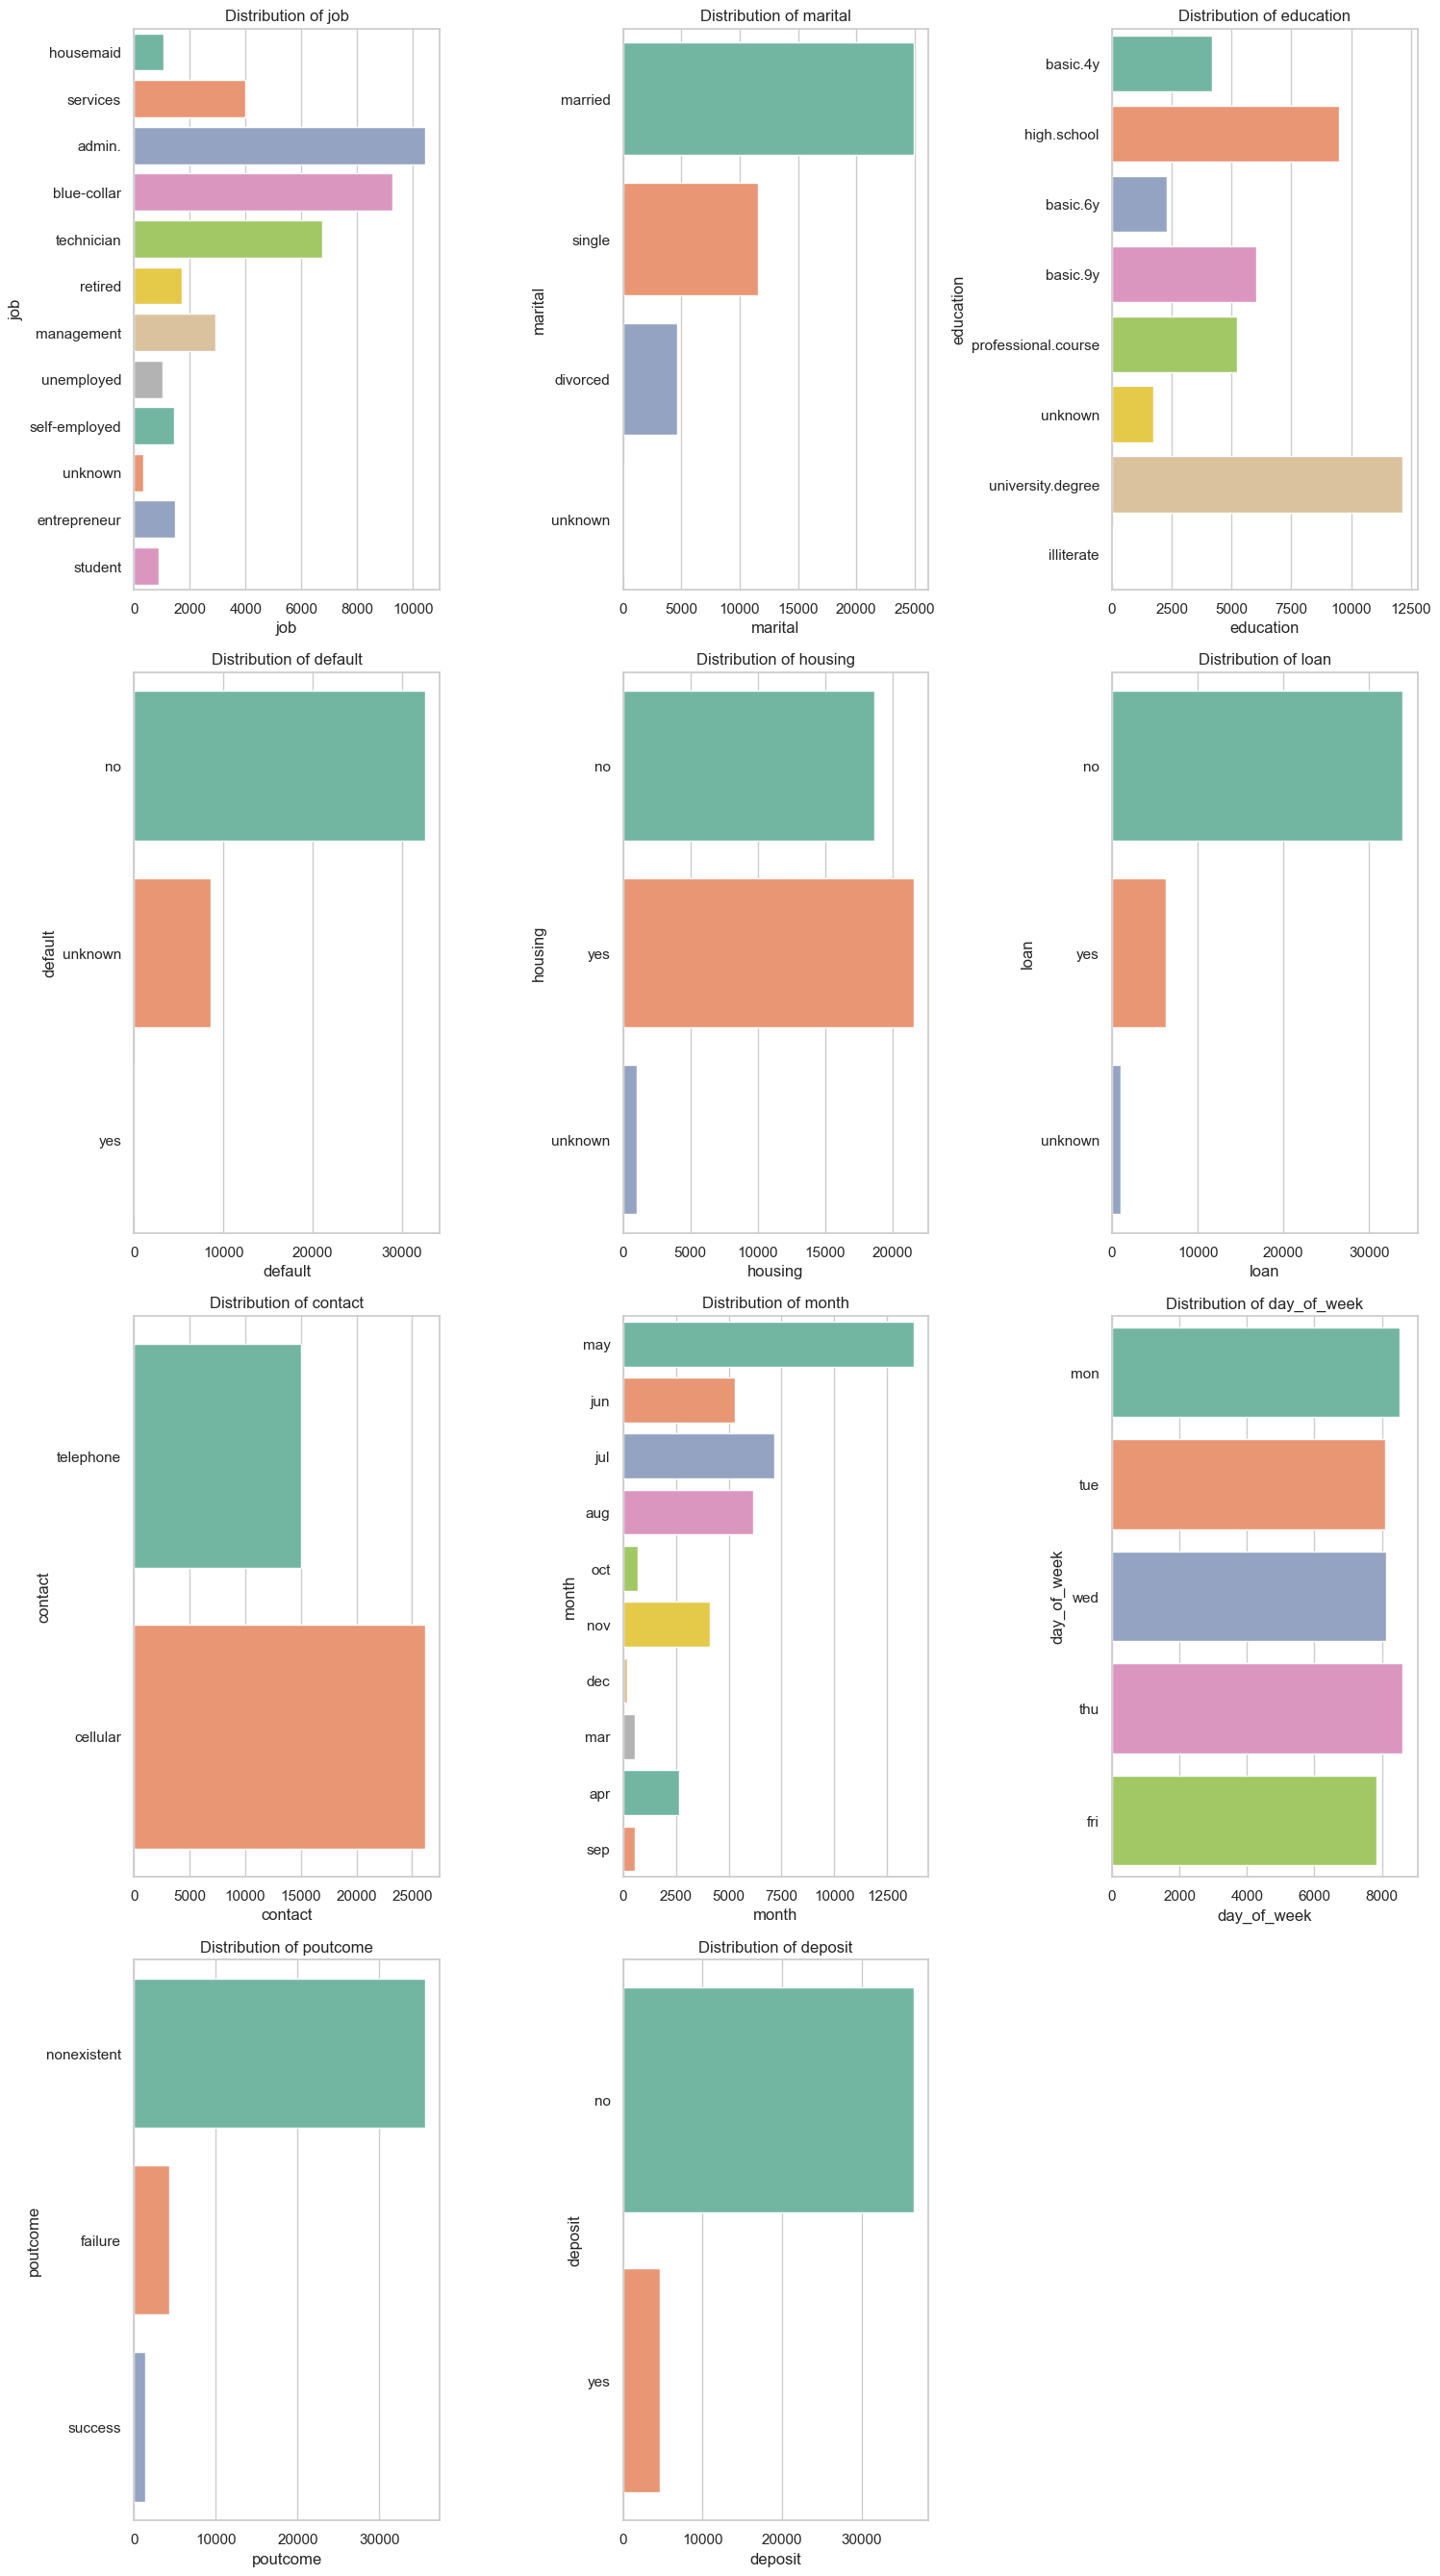

In [1560]:
# Set the figure size and style
plt.figure(figsize=(15, 80))
sns.set(style='whitegrid')

# Create subplots for each categorical feature
for plotnumber, categorical_feature in enumerate(categorical_features, 1):
    plt.subplot(12, 3, plotnumber)  
    
    # Use the 'hue' parameter to assign a unique color to each category within the feature
    sns.countplot(y=categorical_feature, data=df, hue=categorical_feature, palette='Set2')
    
    plt.xlabel(categorical_feature)  
    plt.title(f'Distribution of {categorical_feature}')  

plt.tight_layout()
plt.show()

**Findings:**

- **Occupational Distribution**: Blue-collar workers, admin, and technicians represent approximately 60% of the total customer base.

- **Marital Status**: The majority of potential customers are married, with over 25,000 customers falling into this category.

- **Education**: Most potential customers have completed university degree.

- **Credit Default**: There is a clear imbalance in the 'default' feature, where most customers have no credit default. Despite the importance of this variable for assessing credit risk, it appears to have little correlation with the likelihood of subscribing to a deposit.

- **Loan and Housing Loan Status**: A larger portion of potential customers do not have loans or housing loans compared to those who do.

- **Preferred Contact Method**: Cellular is the predominant contact method. 

- **Marketing Activity**: May saw the highest volume of marketing activities, while December recorded the fewest.

- **Previous Campaign Outcomes**: The results of previous campaigns are mostly nonexistent, yet all customers listed in the dataset have been involved in previous campaigns, as indicated by the `pdays` feature.

#### Numerical features correlation against the target label

In [1564]:
# Convert the 'deposit' feature into a numeric label
df['label_deposit'] = df['deposit'].map({'yes': 1, 'no': 0})

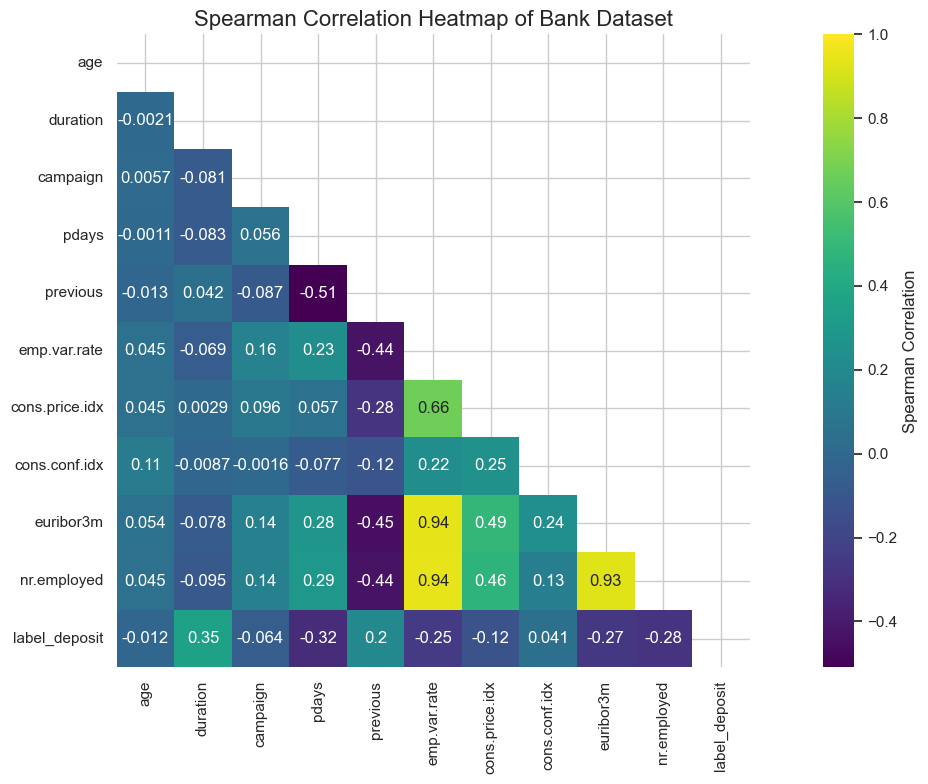

In [1566]:
df_numeric = df.select_dtypes(include=[np.number])

# Create a mask to hide the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(df_numeric.corr(), dtype=bool))

# Set up the figure size
plt.figure(figsize=(15, 8))

# Plot the heatmap with Spearman correlation
sns.heatmap(df_numeric.corr(method='spearman'), cmap='viridis', annot=True, mask=mask, vmax=1, 
            cbar_kws={'label': 'Spearman Correlation'}, square=True)

plt.title('Spearman Correlation Heatmap of Bank Dataset', size=16)
plt.show()

Following the coefficient correlation interpretation 
- 0.00-0.199 is very weak
- 0.20-0.399 is weak
- 0.40-0.599 is medium
- 0.60-0.799 is strong
- 0.80-1.000 is very strong

'Age' and 'pdays' exhibit very weak negative correlations with deposit subscriptions.

Notably, only 'duration' demonstrates a moderate positive correlation with deposit (0.35), suggesting a strong association between longer call durations and increased likelihood of successful term deposit subscriptions.

The remaining features display weak or very weak correlations with the target variable.

### 3.4.2 Target label Visualization

In [1570]:
# Create a copy of dataset for EDA purposes
df2 = df.copy()

In [1572]:
def convert_to_binary(df2, column_name):
  df2[column_name + '_num'] = df2[column_name].apply(lambda x: 1 if x == 'yes' else 0)
  return df2[column_name + '_num'].value_counts()

# Convert binary columns to integer
convert_to_binary(df2, 'default')
convert_to_binary(df2, 'housing')
convert_to_binary(df2, 'loan')
convert_to_binary(df2, 'deposit')

deposit_num
0    36548
1     4640
Name: count, dtype: int64

In [1574]:
df2.drop(['default'], axis=1, inplace=True) 

In [1576]:
def map_month_to_number(df2):
  month_mapping = {month[:3].lower(): i+1 for i, month in enumerate(calendar.month_name)}
  df2['month_num'] = df2['month'].map(month_mapping)
  return df2

df2 = map_month_to_number(df2)

In [1578]:
# Change month_num datatype from float64 to int64
df2['month_num'] = df2['month_num'].astype(np.int64)

In [1580]:
# Converting duration from second to minute for easier interpretation
df2['duration'] = df2['duration']/60
df2['duration'] = df2['duration'].apply(lambda x: round(x, 2))

In [1582]:
# Check current dataframe
df2.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit,label_deposit,default_num,housing_num,loan_num,deposit_num,month_num
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,4.35,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,6
1,57,services,married,high.school,no,no,telephone,may,mon,2.48,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,6
2,37,services,married,high.school,yes,no,telephone,may,mon,3.77,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,1,0,0,6
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,2.52,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,6
4,56,services,married,high.school,no,yes,telephone,may,mon,5.12,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,1,0,6


#### Lets do feature by feature analysis

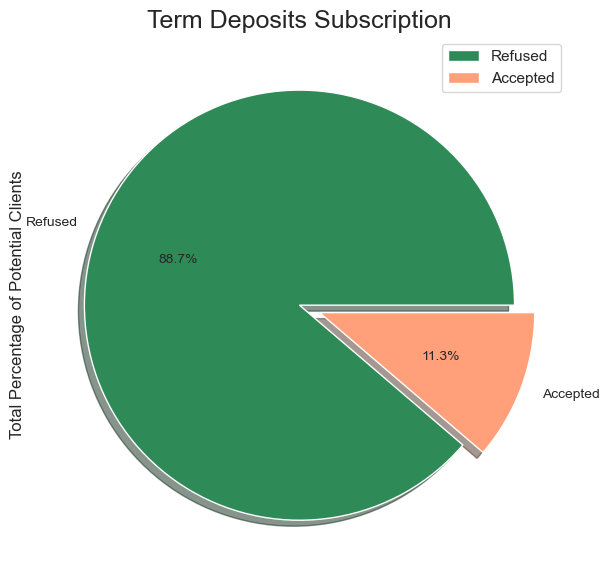

In [1585]:
def create_deposit_pie_chart(df2):
  """
  Creates a pie chart visualizing the distribution of 'deposit_num' (accepted/refused) in the given DataFrame.

  Args:
    df: The pandas DataFrame containing the 'deposit_num' column.
  """
  plt.figure(figsize=(10, 6))
  colors = ['seagreen', 'lightsalmon']
  labels = ['Refused', 'Accepted'] 
  df2['deposit_num'].value_counts().plot.pie(
      explode=[0, 0.1], 
      autopct='%1.1f%%', 
      shadow=True, 
      colors=colors, 
      labels=labels, 
      fontsize=10
  )
  plt.legend(loc='best')
  plt.title('Term Deposits Subscription', fontsize=18)
  plt.ylabel('Total Percentage of Potential Clients')
  plt.show()  

# create the pie chart
create_deposit_pie_chart(df2)

In [1587]:
# Count occurrences of 'yes' and 'no' in the 'deposit' column
deposit_counts = df2['deposit'].value_counts()

print(deposit_counts) 

deposit
no     36548
yes     4640
Name: count, dtype: int64


A huge percentage 88.7% (36548) of the population was refused to subscribe to term deposit. Need to really drill into what are the factors for refusal

#### Age - explore the age groupwise deposits

            counts         percentage        
deposit         no     yes         no     yes
age_group                                    
18-29       6240.0  1110.0     84.90%  15.10%
30-39      14788.0  1597.0     90.25%   9.75%
40-49       9403.0   837.0     91.83%   8.17%
50-59       5602.0   668.0     89.35%  10.65%
60+          496.0   414.0     54.51%  45.49%


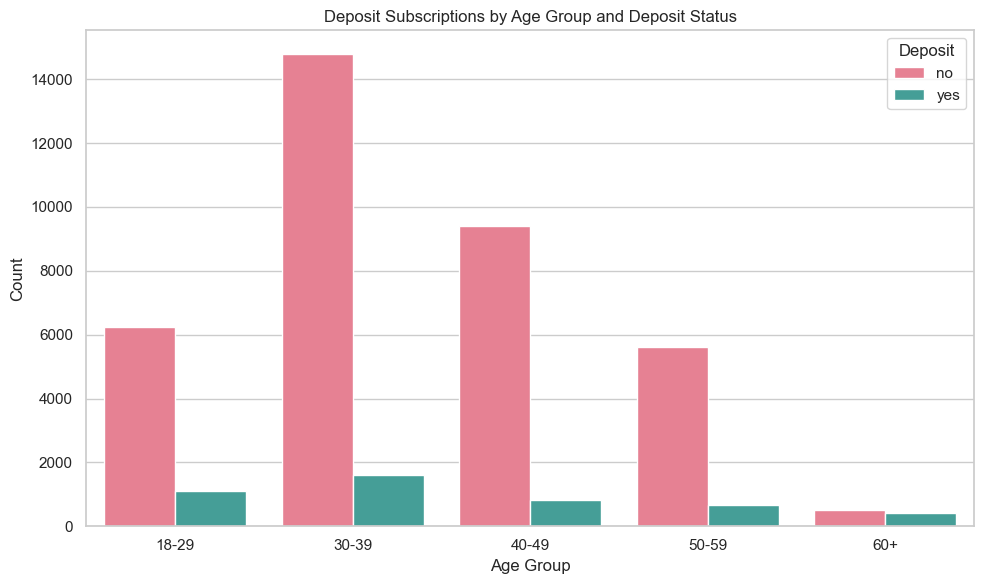

In [1591]:
# Define age groups (you can adjust these bins as needed)
bins = [18, 30, 40, 50, 60, np.inf]  # Use np.inf for infinity
labels = ['18-29', '30-39', '40-49', '50-59', '60+']
df2['age_group'] = pd.cut(df2['age'], bins=bins, labels=labels)

# Group by age_group and deposit, then count occurrences
grouped_df = df2.groupby(['age_group', 'deposit']).size().reset_index(name='counts')

# Calculate total count for each age group using transform to align with grouped_df
grouped_df['total_count'] = grouped_df.groupby('age_group')['counts'].transform('sum')

# Calculate percentage of 'yes' and 'no' deposits
grouped_df['percentage'] = (grouped_df['counts'] / grouped_df['total_count']) * 100

# Pivot the table for easier access to 'yes' and 'no' counts and percentages
pivot_table = grouped_df.pivot_table(
    index='age_group', 
    columns='deposit', 
    values=['counts', 'percentage'], 
    fill_value=0,
    observed=True
)

pivot_table['percentage'] = pivot_table['percentage'].applymap('{:.2f}%'.format)
print(pivot_table)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='counts', hue='deposit', data=grouped_df, palette="husl")
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Deposit Subscriptions by Age Group and Deposit Status')
plt.legend(title='Deposit')
plt.show()


**Findings:**

- Targeting Focus: The bank appears to have specifically targeted individuals in their 30s followed by 40s, 20s, and then over 50s. 60s age group was targeted least
- Age Group Subscription Rates:
  - The 20-year-old group demonstrated the higher subscription rate at approximately over 15% compared to 30s, 40s, and 50s with 9.75%, 8.17% and 10.65% respectively.
  - The 60+ age group exhibited the highest rate at 45.49%.
    
Key Demographics: The findings suggest that individuals in both the youngest and oldest age groups were most likely to subscribe to term deposits.

#### Job - explore the deposits by job

               counts         percentage        
deposit            no     yes         no     yes
job_group                                       
admin.         9070.0  1352.0     87.03%  12.97%
blue-collar    8616.0   638.0     93.11%   6.89%
entrepreneur   1332.0   124.0     91.48%   8.52%
housemaid       954.0   106.0     90.00%  10.00%
management     2596.0   328.0     88.78%  11.22%
retired        1286.0   434.0     74.77%  25.23%
self-employed  1272.0   149.0     89.51%  10.49%
services       3646.0   323.0     91.86%   8.14%
student         600.0   275.0     68.57%  31.43%
technician     6013.0   730.0     89.17%  10.83%
unemployed      870.0   144.0     85.80%  14.20%
unknown         293.0    37.0     88.79%  11.21%


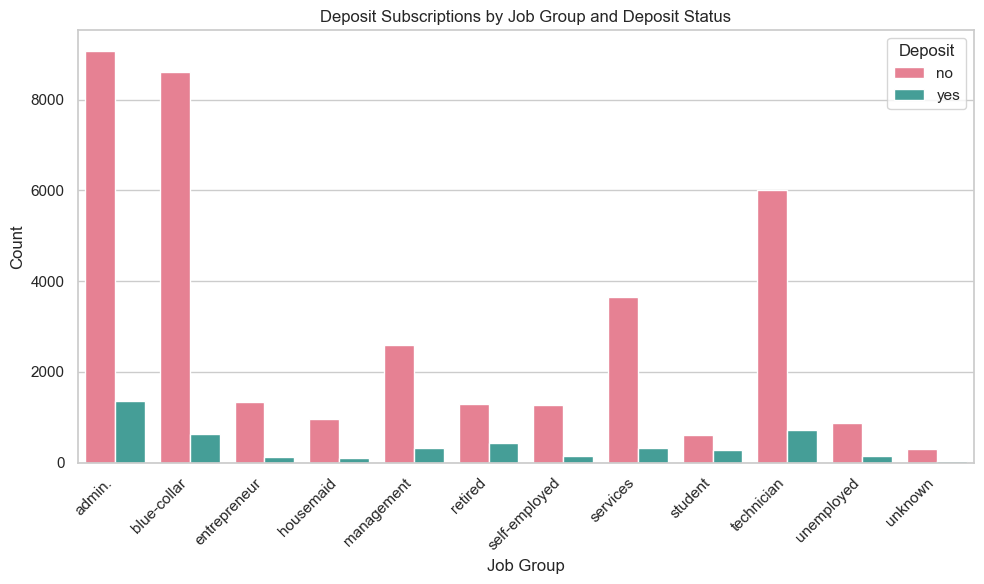

In [1595]:
# Get unique job values
unique_jobs = df2['job'].unique()

# Create a dictionary to map jobs to job groups
job_groups = {job: job for job in unique_jobs} 

# Create a new column 'job_group'
df2['job_group'] = df2['job'].map(job_groups)

# Group by job_group and deposit, then count occurrences
grouped_df = df2.groupby(['job_group', 'deposit']).size().reset_index(name='counts')

# Calculate total count for each job group using transform to align with grouped_df
grouped_df['total_count'] = grouped_df.groupby('job_group')['counts'].transform('sum')

# Calculate percentage of 'yes' and 'no' deposits
grouped_df['percentage'] = (grouped_df['counts'] / grouped_df['total_count']) * 100

# Pivot table for easier access to 'yes' and 'no' counts and percentages
pivot_table = grouped_df.pivot_table(
    index='job_group', 
    columns='deposit', 
    values=['counts', 'percentage'], 
    fill_value=0,
    observed=True
)

# Format percentages to display with '%' sign
pivot_table['percentage'] = pivot_table['percentage'].applymap(lambda x: f'{x:.2f}%')  # Use lambda function for applymap

# Print the pivot table
print(pivot_table)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='job_group', y='counts', hue='deposit', data=grouped_df, palette="husl")
plt.xlabel('Job Group')
plt.ylabel('Count')
plt.title('Deposit Subscriptions by Job Group and Deposit Status')
plt.legend(title='Deposit')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

**Findings:**

- Unemployed and Retired Individuals Show Higher Subscription Rates: Unemployed individuals exhibited a 14.20% subscription rate, while retired individuals demonstrated a 25.23% subscription rate, both higher than the average across most other job groups.
- Students also demonstrate a relatively high subscription rate at 31.43%, potentially indicating a greater propensity for saving among this demographic.
- The majority of individuals in all job groups except "Retired" and "Student" did not subscribe to the term deposit. This suggests a general reluctance to subscribe across most professional categories.
- "Blue-collar" workers had the lowest subscription rate at 6.89%, indicating a significantly lower propensity to subscribe to term deposits compared to other groups.


#### Marital Status - explore the deposits by marital status

           counts         percentage        
deposit        no     yes         no     yes
marital                                     
divorced   4136.0   476.0     89.68%  10.32%
married   22396.0  2532.0     89.84%  10.16%
single     9948.0  1620.0     86.00%  14.00%
unknown      68.0    12.0     85.00%  15.00%


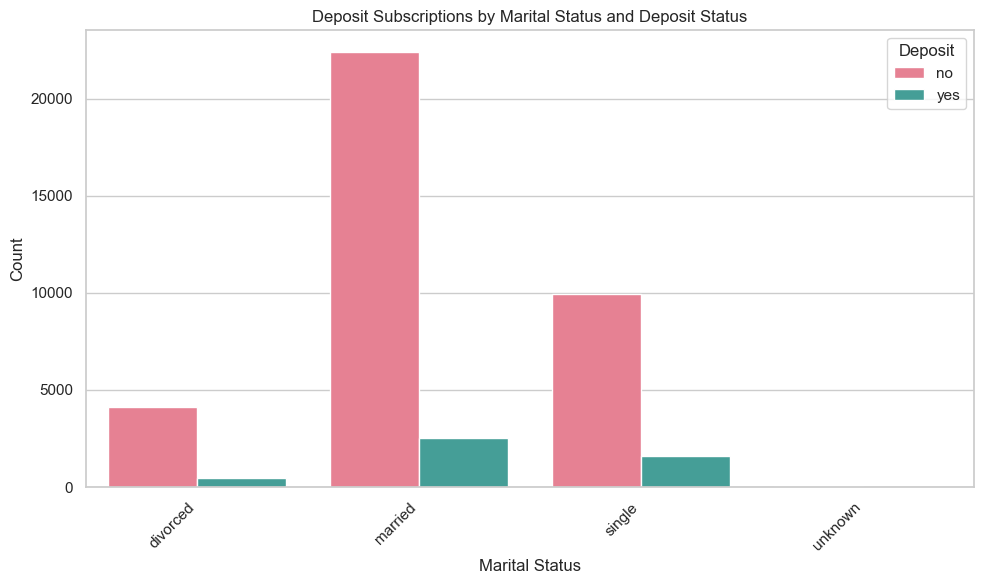

In [1599]:
# Get unique marital statuses
unique_marital = df2['marital'].unique()

# Group by marital status and deposit, then count occurrences
grouped_df = df2.groupby(['marital', 'deposit']).size().reset_index(name='counts')

# Calculate total count for each marital status using transform to align with grouped_df
grouped_df['total_count'] = grouped_df.groupby('marital')['counts'].transform('sum')

# Calculate percentage of 'yes' and 'no' deposits
grouped_df['percentage'] = (grouped_df['counts'] / grouped_df['total_count']) * 100

# Pivot table for easier access to 'yes' and 'no' counts and percentages
pivot_table = grouped_df.pivot_table(
    index='marital', 
    columns='deposit', 
    values=['counts', 'percentage'], 
    fill_value=0,
    observed=True
)

# Format percentages to display with '%' sign
pivot_table['percentage'] = pivot_table['percentage'].applymap(lambda x: f'{x:.2f}%')  # Use lambda function for applymap

# Print the pivot table
print(pivot_table)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='marital', y='counts', hue='deposit', data=grouped_df, palette="husl")
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Deposit Subscriptions by Marital Status and Deposit Status')
plt.legend(title='Deposit')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

**Findings:**

- Single individuals exhibited the highest subscription rate (14.00%), suggesting a greater inclination for term deposits compared to married and divorced individuals.
- Married individuals had the lowest subscription rate (10.16%), indicating a lower likelihood of subscribing to term deposits.
- Across all marital statuses, a significant majority did not subscribe to the term deposit. This suggests a general reluctance to subscribe across all marital statuses.


#### Education - explore the deposits by education

                      counts         percentage        
deposit                   no     yes         no     yes
education                                              
basic.4y              3748.0   428.0     89.75%  10.25%
basic.6y              2104.0   188.0     91.80%   8.20%
basic.9y              5572.0   473.0     92.18%   7.82%
high.school           8484.0  1031.0     89.16%  10.84%
illiterate              14.0     4.0     77.78%  22.22%
professional.course   4648.0   595.0     88.65%  11.35%
university.degree    10498.0  1670.0     86.28%  13.72%
unknown               1480.0   251.0     85.50%  14.50%


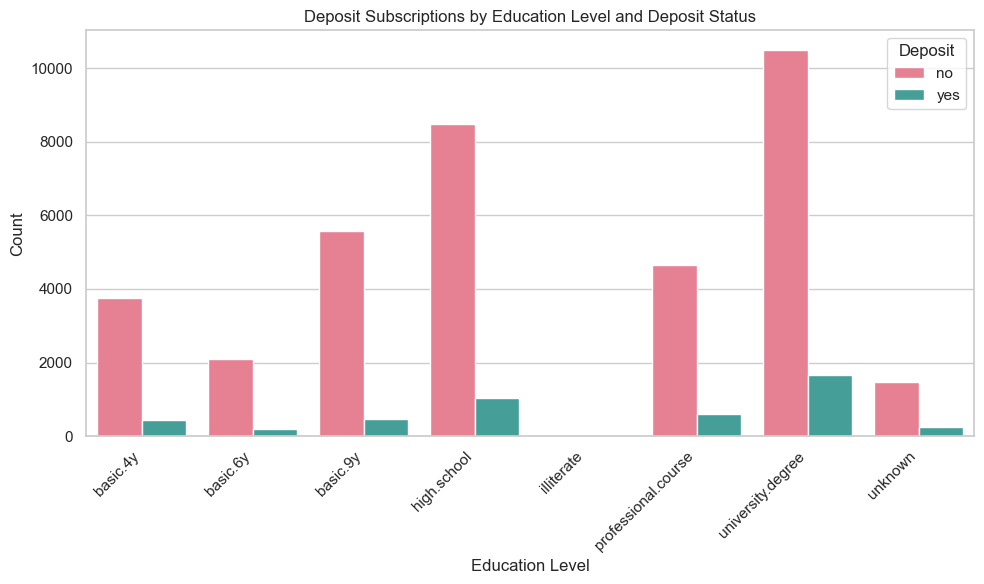

In [1603]:
# Get unique education levels
unique_education = df2['education'].unique()

# Group by education and deposit, then count occurrences
grouped_df = df2.groupby(['education', 'deposit']).size().reset_index(name='counts')

# Calculate total count for each education level using transform to align with grouped_df
grouped_df['total_count'] = grouped_df.groupby('education')['counts'].transform('sum')

# Calculate percentage of 'yes' and 'no' deposits
grouped_df['percentage'] = (grouped_df['counts'] / grouped_df['total_count']) * 100

# Pivot table for easier access to 'yes' and 'no' counts and percentages
pivot_table = grouped_df.pivot_table(
    index='education', 
    columns='deposit', 
    values=['counts', 'percentage'], 
    fill_value=0,
    observed=True
)

# Format percentages to display with '%' sign
pivot_table['percentage'] = pivot_table['percentage'].applymap(lambda x: f'{x:.2f}%')  # Use lambda function for applymap

# Print the pivot table
print(pivot_table)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='education', y='counts', hue='deposit', data=grouped_df, palette="husl")
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Deposit Subscriptions by Education Level and Deposit Status')
plt.legend(title='Deposit')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability (optional, depending on number of education levels)
plt.show()

**Findings:**

**Subscription Rates and Education Level:**
- Individuals with lower levels of education (basic.4y, basic.6y, basic.9y) generally had lower subscription rates. This suggests a potential relationship between lower education levels and a lower propensity to subscribe to term deposits.
- "University.degree" showed a relatively low subscription rate (13.72%) compared to some other education levels.
- "Illiterate" and "unknown" categories have small sample sizes and should be interpreted with caution.

Key Observations:

- The relationship between education level and deposit subscription is not straightforward.
- Factors beyond education level, such as income, financial stability, and investment knowledge, likely play significant roles in determining deposit subscription behavior.

5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')


#### Housing and Loan - explore the deposits by housing, loan 

In [1608]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  object  
 2   marital         41188 non-null  object  
 3   education       41188 non-null  object  
 4   housing         41188 non-null  object  
 5   loan            41188 non-null  object  
 6   contact         41188 non-null  object  
 7   month           41188 non-null  object  
 8   day_of_week     41188 non-null  object  
 9   duration        41188 non-null  float64 
 10  campaign        41188 non-null  int64   
 11  pdays           41188 non-null  int64   
 12  previous        41188 non-null  int64   
 13  poutcome        41188 non-null  object  
 14  emp.var.rate    41188 non-null  float64 
 15  cons.price.idx  41188 non-null  float64 
 16  cons.conf.idx   41188 non-null  float64 
 17  euribor3m   


Pivot Table for Housing:
          counts         percentage        
deposit       no     yes         no     yes
housing                                    
no       16596.0  2026.0     89.12%  10.88%
unknown    883.0   107.0     89.19%  10.81%
yes      19069.0  2507.0     88.38%  11.62%


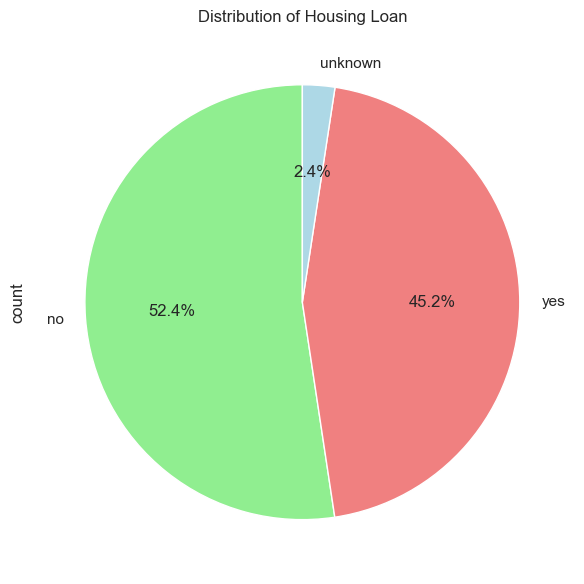

In [1610]:
# Housing analysis
col = 'housing'

# Group by housing and deposit, then count occurrences
grouped_df = df2.groupby([col, 'deposit']).size().reset_index(name='counts')

# Calculate total count for each housing category
grouped_df['total_count'] = grouped_df.groupby(col)['counts'].transform('sum')

# Calculate percentage of 'yes' and 'no' deposits
grouped_df['percentage'] = (grouped_df['counts'] / grouped_df['total_count']) * 100

# Pivot table for housing data
pivot_table = grouped_df.pivot_table(
    index=col, 
    columns='deposit', 
    values=['counts', 'percentage'], 
    fill_value=0,
    observed=True
)

# Format percentages to display with '%' sign
pivot_table['percentage'] = pivot_table['percentage'].applymap(lambda x: f'{x:.2f}%')

# Print the pivot table for housing
print(f"\nPivot Table for Housing:")
print(pivot_table)

# Create pie chart for housing distribution
plt.figure(figsize=(6, 6))
df2[col].value_counts().plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['lightgreen', 'lightcoral', 'lightblue'], 
    labels=df2[col].unique(), 
    title=f'Distribution of Housing Loan'
)
plt.show()

**Findings:**

- Individuals with housing loans had a slightly higher subscription rate (11.62%) for term deposits compared to those without housing loans (10.88%).
- A majority of individuals in all housing loan categories did not subscribe to term deposits.
- The difference in subscription rates between individuals with and without housing loans is relatively small.
- A small percentage of individuals have an unknown housing loan status.


Pivot Table for Loan:
          counts         percentage        
deposit       no     yes         no     yes
loan                                       
no       30100.0  3850.0     88.66%  11.34%
unknown    883.0   107.0     89.19%  10.81%
yes       5565.0   683.0     89.07%  10.93%


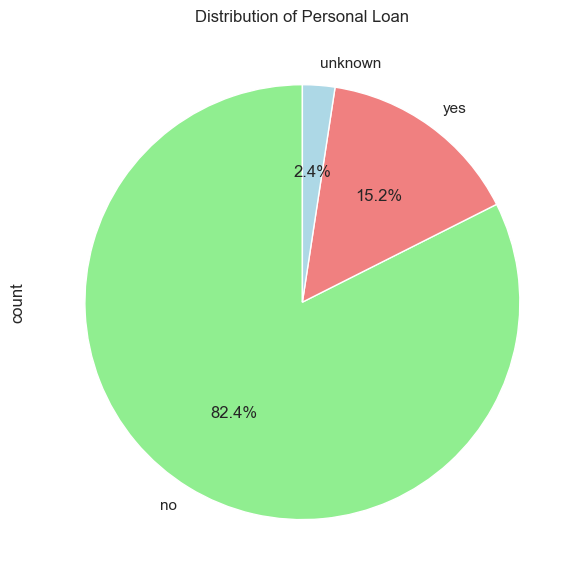

In [1613]:
# Loan analysis (similar structure as housing analysis)
col = 'loan'

# Group by loan and deposit, then count occurrences
grouped_df = df2.groupby([col, 'deposit']).size().reset_index(name='counts')

# Calculate total count for each loan category
grouped_df['total_count'] = grouped_df.groupby(col)['counts'].transform('sum')

# Calculate percentage of 'yes' and 'no' deposits
grouped_df['percentage'] = (grouped_df['counts'] / grouped_df['total_count']) * 100

# Pivot table for loan data
pivot_table = grouped_df.pivot_table(
    index=col, 
    columns='deposit', 
    values=['counts', 'percentage'], 
    fill_value=0,
    observed=True
)

# Format percentages to display with '%' sign
pivot_table['percentage'] = pivot_table['percentage'].applymap(lambda x: f'{x:.2f}%')

# Print the pivot table for loan
print(f"\nPivot Table for Loan:")
print(pivot_table)

# Create pie chart for loan distribution
plt.figure(figsize=(6, 6))
df2[col].value_counts().plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['lightgreen', 'lightcoral', 'lightblue'], 
    labels=df2[col].unique(), 
    title=f'Distribution of Personal Loan'
)
plt.show()

**Findings:**
- Overall, a slightly lower percentage of individuals with personal loans subscribed to term deposits (10.93%) compared to those without (11.34%). This suggests a subtle positive relationship between having NO personal loan and subscribing to a term deposit.
- The difference in subscription rates between individuals with and without personal loans is relatively small. This suggests that having a personal loan may not be a strong predictor of term deposit subscription behavior. Other factors likely play a more significant role.
- A small percentage of individuals have 'unknown' loan status. This category requires further investigation to understand the reasons for missing data and its potential impact on the analysis.

#### Contact - explore the deposits by contact method

            counts         percentage        
deposit         no     yes         no     yes
contact                                      
cellular   22291.0  3853.0     85.26%  14.74%
telephone  14257.0   787.0     94.77%   5.23%


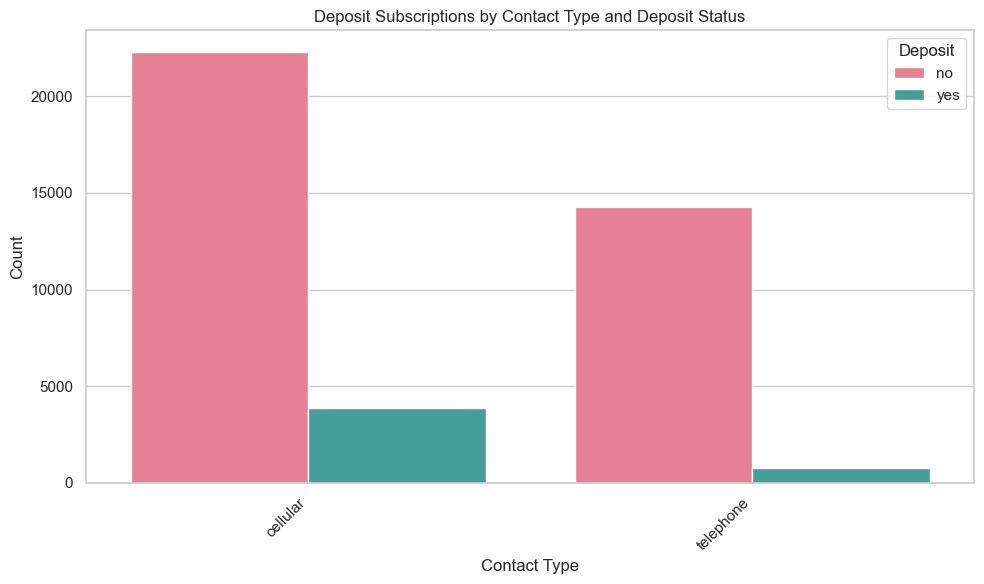

In [1620]:
# Get unique contact types
unique_contact = df2['contact'].unique()

# Group by contact and deposit, then count occurrences
grouped_df = df2.groupby(['contact', 'deposit']).size().reset_index(name='counts')

# Calculate total count for each contact type using transform to align with grouped_df
grouped_df['total_count'] = grouped_df.groupby('contact')['counts'].transform('sum')

# Calculate percentage of 'yes' and 'no' deposits
grouped_df['percentage'] = (grouped_df['counts'] / grouped_df['total_count']) * 100

# Pivot table for easier access to 'yes' and 'no' counts and percentages
pivot_table = grouped_df.pivot_table(
    index='contact', 
    columns='deposit', 
    values=['counts', 'percentage'], 
    fill_value=0,
    observed=True
)

# Format percentages to display with '%' sign
pivot_table['percentage'] = pivot_table['percentage'].applymap(lambda x: f'{x:.2f}%')

# Print the pivot table
print(pivot_table)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='contact', y='counts', hue='deposit', data=grouped_df, palette="husl")
plt.xlabel('Contact Type')
plt.ylabel('Count')
plt.title('Deposit Subscriptions by Contact Type and Deposit Status')
plt.legend(title='Deposit')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability (optional)
plt.show()

**Findings:**

- Individuals contacted via 'cellular' had a significantly higher subscription rate (14.74%) compared to those contacted via 'telephone' (5.23%). This suggests that 'cellular' contact may be a more effective channel for marketing and promoting term deposits.
- A much larger proportion of individuals contacted via 'telephone' did not subscribe to the term deposit (94.77%) compared to those contacted via 'cellular' (85.26%). This further supports the finding that 'cellular' contact is more effective for driving term deposit subscriptions.

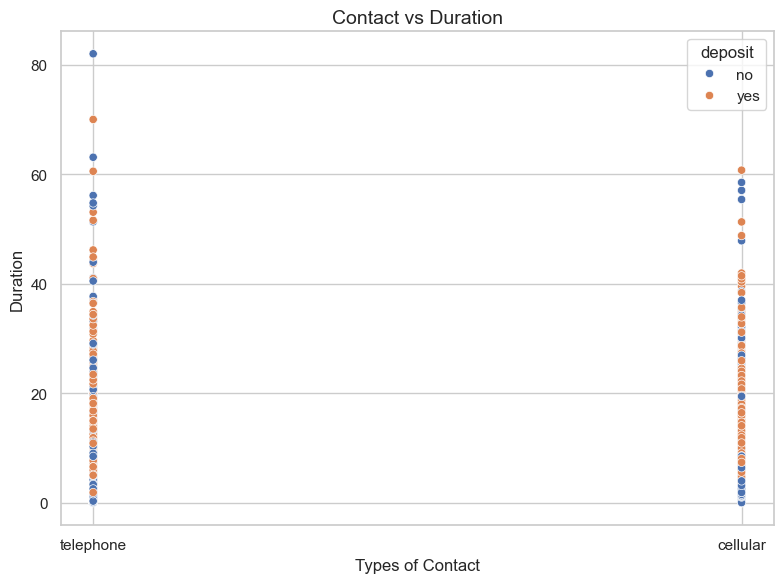

In [1623]:
# explore contact vs duration with respect to deposits subscription
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df2, x='contact', y='duration', hue='deposit')
plt.title('Contact vs Duration', size=14)
plt.xlabel('Types of Contact', size=12)
plt.ylabel('Duration', size=12);

**Key Takeaways:**

- Cellular contact emerges as the most effective channel for acquiring new term deposit subscribers.
- A strong positive correlation exists between call duration and the likelihood of a successful term deposit subscription. This trend appears consistent across all contact methods.



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [1628]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Business Objective**

This AI ML project, utilizing a dataset from a Portuguese bank, aims to enhance the success rate of marketing campaigns for long-term deposit subscriptions. Through Machine Learning analysis, we will investigate the impact of key factors, including:

Loan Products: The influence of existing loan products (housing, personal) on subscription likelihood.

Education Level: The relationship between customer education and deposit subscription propensity.

Contact Methods: The effectiveness of different contact channels (cellular, telephone) in driving customer engagement and conversions.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

As we discussed earlier we are targeting only columns 1-7 and define the Encoding scheme:

1. job: binary encoding
2. marital: one-hot encoding
3. education: one-hot encoding
4. default: one-hot encoding
5. housing: one-hot encoding
6. loan: one-hot encoding
7. contact: one-hot encoding

Then create a transformer pipeline by including encoding methods selected for each feature. In this project, I would like to try several classifier models, which are:

    1. Logistic Regression
    2. K Nearest Neighbor
    3. Decision Tree 
    4. Support Vector Machines

Since Logistic Regression and KNN models are sensitive to the value of data points, we need to scale 2 numerical features that still have a wide range of values (age and balance). By creating two transformers, I will compare the cross-validation results between normal and scaled data. 

In [1634]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
import category_encoders as ce
from sklearn.pipeline import Pipeline

# Create a transformer
transformer = ColumnTransformer([
    ('one hot encoder', OneHotEncoder(drop='first'), ['marital', 'education', 'default', 'housing', 'loan', 'contact']),
    ('binary encoder', ce.BinaryEncoder(), ['job'])
], remainder='passthrough')

# Create a transformer for scaling
#transformer_scaled = ColumnTransformer([
#    ('one hot encoder', OneHotEncoder(drop='first'), ['marital', 'education', 'default', 'housing', 'loan', 'contact']),
#    ('binary encoder', ce.BinaryEncoder(), ['job']),
#    ('scaling', RobustScaler(), ['age'])
#], remainder='passthrough')

In [1636]:
# Fitting transforming transformer 
transformer.fit_transform(df)

array([[1.0, 0.0, 0.0, ..., 5191.0, 'no', 0],
       [1.0, 0.0, 0.0, ..., 5191.0, 'no', 0],
       [1.0, 0.0, 0.0, ..., 5191.0, 'no', 0],
       ...,
       [1.0, 0.0, 0.0, ..., 4963.6, 'no', 0],
       [1.0, 0.0, 0.0, ..., 4963.6, 'yes', 1],
       [1.0, 0.0, 0.0, ..., 4963.6, 'no', 0]], dtype=object)

In [1686]:
# Fitting transforming transformer_scaled
transformer_scaled.fit_transform(df)

array([[1.0, 0.0, 0.0, ..., 5191.0, 'no', 0],
       [1.0, 0.0, 0.0, ..., 5191.0, 'no', 0],
       [1.0, 0.0, 0.0, ..., 5191.0, 'no', 0],
       ...,
       [1.0, 0.0, 0.0, ..., 4963.6, 'no', 0],
       [1.0, 0.0, 0.0, ..., 4963.6, 'yes', 1],
       [1.0, 0.0, 0.0, ..., 4963.6, 'no', 0]], dtype=object)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [1689]:
# Splitting data into X and y
X = df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact']]
#y = df[['label_deposit']]
y = df[['deposit']]

In [1691]:
# Create a train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size = 0.2,
    stratify = y,
    random_state = 2021)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

Lets build decision tree as baseline model

In [1695]:
#Decision tree model
dtc_pipe = Pipeline ([
    ('transformer', transformer),
    ('scale', StandardScaler(with_mean=False)),
    ('model', DecisionTreeClassifier(max_depth=5))
])

In [1697]:
# Train the classifiers
dtc = dtc_pipe.fit(X_train, y_train)

# use the model to predict the class labels of the test-set
dtc_pred = dtc.predict(X_test)

In [1699]:
# Evaluate the performance of the baseline model 
# using accuracy, precision, recall, and f1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, dtc_pred)
precision = precision_score(y_test, dtc_pred, average='macro')
recall = recall_score(y_test, dtc_pred, average='macro')
f1 = f1_score(y_test, dtc_pred, average='macro')

print("Accuracy: {:.6f}".format(accuracy))
print("Precision: {:.6f}".format(precision))
print("Recall: {:.6f}".format(recall))
print("F1-score: {:.6f}".format(f1))

Accuracy: 0.887351
Precision: 0.443676
Recall: 0.500000
F1-score: 0.470157


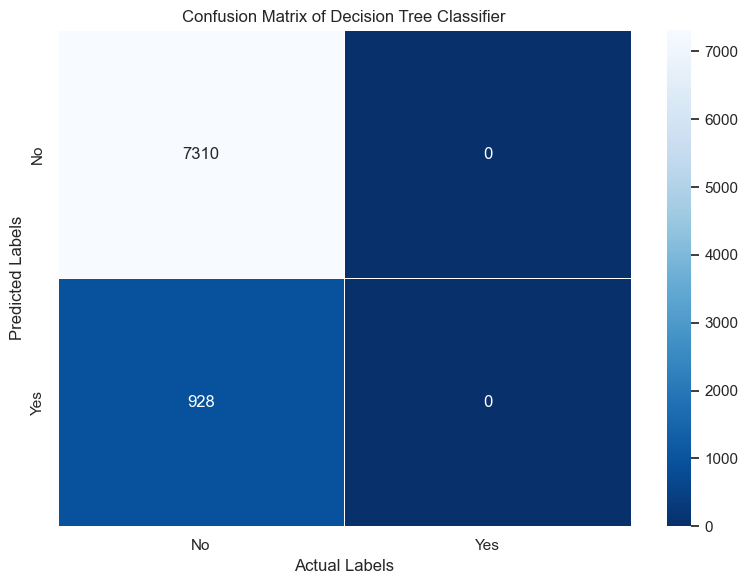

In [1701]:
#Build a confusion matrix to visualize
conf_matrix = confusion_matrix(y_test, dtc_pred)

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))  
ax = sns.heatmap(conf_matrix, annot=True, cmap="Blues_r", fmt="d", linewidths=0.5)

# Set labels and title
ax.set_xlabel("Actual Labels")
ax.set_ylabel("Predicted Labels")
ax.set_title("Confusion Matrix of Decision Tree Classifier")

# Set tick labels
ax.xaxis.set_ticklabels(["No", "Yes"])
ax.yaxis.set_ticklabels(["No", "Yes"])

plt.show()

In the context of our Decision Tree Classifier, the confusion matrix reveals a high number of True Positives (TPs) where the model correctly predicted 'No' (indicating no subscription to the long-term product), while the number of True Negatives (TNs) appears to be zero.

While the model exhibits an overall accuracy of 0.89, further analysis reveals concerningly low recall and precision scores ( below 0.51).

Low Recall: Indicates a high number of False Negatives, meaning the model incorrectly predicted that customers would not subscribe when they actually did. This could be attributed to class imbalance within the dataset (where "No" subscriptions are significantly more frequent) or suboptimal model hyperparameters.

Low Precision: Suggests a high number of False Positives, meaning the model incorrectly predicted that customers would subscribe when they did not. This issue also might be linked to class imbalance or insufficient model tuning.

The observed high number of TPs in the confusion matrix, despite the low recall and precision, is likely a consequence of the dataset's strong bias towards "No" subscriptions. In such cases, the model may be overly inclined to predict the majority class ('No') to achieve high accuracy, even if it misclassifies a significant portion of the minority class ('Yes').

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [1705]:
# Create a Logistic Regression pipeline
lr_pipe = Pipeline([
    ('transformer', transformer), 
    ('scale', StandardScaler(with_mean=False)), 
    ('model', LogisticRegression(max_iter=1000, random_state=42)) 
])

In [1707]:
# Fit the pipeline to the training data
lr_pipe.fit(X_train, y_train) 

# use the model to predict the class labels of the test set:
lr_pred = lr_pipe.predict(X_test)

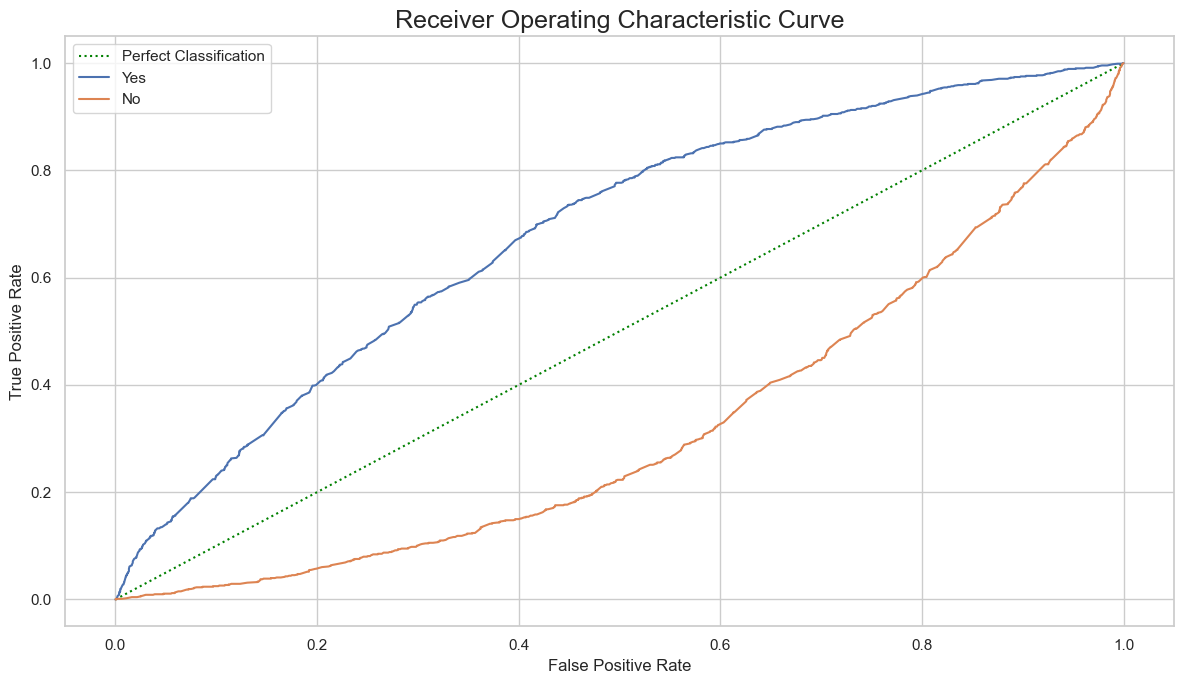

In [1709]:
from sklearn import metrics
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Predict probabilities for the positive class ('Yes')
y_pred_proba = lr_pipe.predict_proba(X_test)
yes_probs = y_pred_proba[:, 1]  # Probabilities for the 'Yes' class

# Calculate ROC curve for class 'Yes'
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=yes_probs, pos_label='yes')

# ROC curve for reference (perfect classification)
plt.plot([0, 1], [0, 1], color='green', linestyle=':', label='Perfect Classification')

# ROC curve for class 'Yes'
plt.plot(fpr, tpr, label='Yes')

# The FPR and TPR for the 'No' class can be derived from the inverse of the 'Yes' class
fpr_no = 1 - fpr
tpr_no = 1 - tpr
plt.plot(fpr_no, tpr_no, label='No')

# Add labels, title, and legend
plt.legend(loc="upper left")
plt.title('Receiver Operating Characteristic Curve', size=18)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Show the plot
plt.show()

**Calculate and Interpret AUC (Area Under the Curve)**

In [1712]:
from sklearn.metrics import roc_auc_score

# Calculate AUC for 'Yes' class
auc_yes = roc_auc_score(y_test, yes_probs)
print(f"AUC for 'Yes' class: {auc_yes:.4f}")

# Calculate AUC for 'No' class (can use inverse of the 'Yes' class AUC)
auc_no = roc_auc_score(y_test, 1 - yes_probs)
print(f"AUC for 'No' class: {auc_no:.4f}")

AUC for 'Yes' class: 0.6823
AUC for 'No' class: 0.3177


**Findings**
The AUC is the area under the ROC curve and is often used as a summary of the classifier's ability to distinguish between the positive and negative classes.
In General:
AUC = 1: Perfect classification.
AUC = 0.5: Random guessing (no discrimination power).
AUC < 0.5: Worse than random (the model is doing worse than a random classifier)

- Unequal AUC values: The significant difference between the AUC values for the "Yes" and "No" classes suggests that the model may be biased towards one class over the other. This could be due to class imbalance in the training data or other factors.

- Model Performance: An AUC of 0.6823 for the "Yes" class is moderate. Higher values (closer to 1.0) generally indicate better model performance.


### Problem 9: Score the Model

What is the accuracy of your model?

In [1716]:
from sklearn.metrics import accuracy_score

# Predict the labels for the test set
y_pred = lr_pipe.predict(X_test)

# Calculate accuracy, precision, recall and f1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, lr_pred, average='macro')
recall = recall_score(y_test, lr_pred, average='macro')
f1 = f1_score(y_test, lr_pred, average='macro')

# Print the accuracy, precision, recall, and F1-score
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-score: {f1:.6f}")


Accuracy: 0.8874
Precision: 0.443676
Recall: 0.500000
F1-score: 0.470157


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [1719]:
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create a dictionary to store results
results = []

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Assuming transformer is already defined (for example, ColumnTransformer or other preprocessing)
# transformer = ColumnTransformer(...) 

# Define the pipeline function
def model_pipeline(model, X_train, y_train, X_test, y_test):
    # Create pipeline with transformer and the given model
    pipeline = Pipeline([
        ('transformer', transformer),
        ('model', model)
    ])
    
    # Measure the training time
    start_time = time.time()
    pipeline.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    # Get training accuracy
    train_accuracy = accuracy_score(y_train, pipeline.predict(X_train))
    
    # Get test accuracy
    test_accuracy = accuracy_score(y_test, pipeline.predict(X_test))
    
    return train_time, train_accuracy, test_accuracy

# Iterate over the models and collect results
for model_name, model in models.items():
    train_time, train_accuracy, test_accuracy = model_pipeline(model, X_train, y_train, X_test, y_test)
    results.append({
        'Model': model_name,
        'Train Time (s)': train_time,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

# Create a DataFrame with results
results_df = pd.DataFrame(results)

# Format the DataFrame for better readability 
results_df = results_df.round({
    'Train Time (s)': 2,  
    'Train Accuracy': 4,  
    'Test Accuracy': 4    
})

# Print the DataFrame 
pd.set_option('display.width', None)  # To avoid wrapping the DataFrame in output
pd.set_option('display.max_columns', None)  # To display all columns
pd.DataFrame(results_df)


,Model,Train Time (s),Train Accuracy,Test Accuracy
0,Logistic Regression,0.11,0.8873,0.8874
1,KNN,0.05,0.8780,0.8751
2,Decision Tree,0.06,0.8913,0.8835
3,SVM,4.59,0.8873,0.8874


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

**Feature Engineering and Exploration:**

Let us now explore the features for their importance in predicting target variable. We visualize the relationship between features and the target variable using techniques like box plots, histograms, or a correlation matrix.

This will help to identify the feature that doesn't add meaningful value to the predictions, it might be best to remove it or transform it into a more meaningful feature.

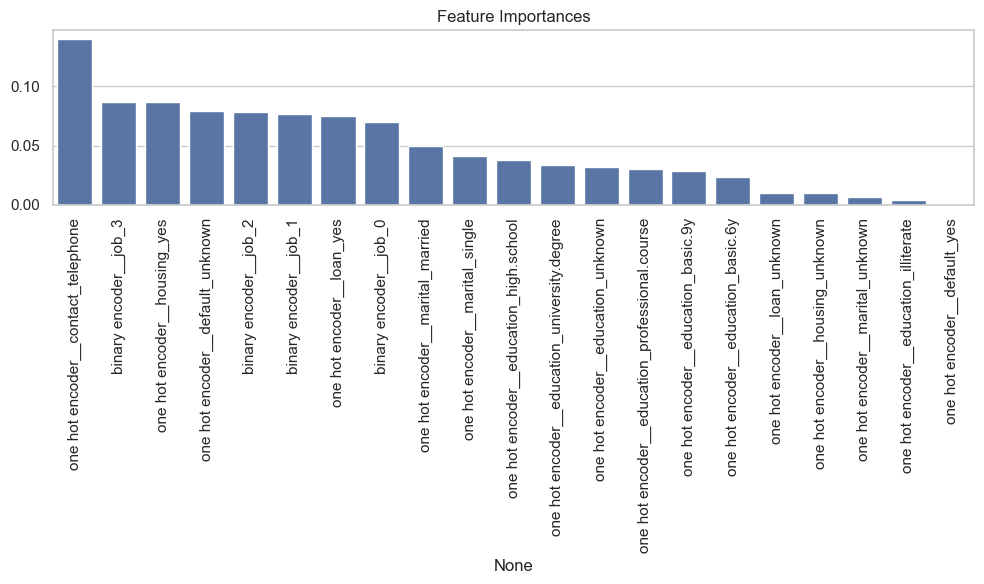

In [1724]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline  # Make sure to import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd  # Ensure pandas is imported

# RandomForestClassifier model
rfc_pipe = Pipeline([
    ('transformer', transformer),  # Assuming 'transformer' is defined elsewhere
    ('model', RandomForestClassifier(random_state=42))
])

# Train the classifiers
rf = rfc_pipe.fit(X_train, y_train)

# Get the RandomForestClassifier from the pipeline
model = rfc_pipe.named_steps['model']  # Access the model from the pipeline

# Get transformed feature names after the transformer
transformed_feature_names = rfc_pipe.named_steps['transformer'].get_feature_names_out()

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=transformed_feature_names)  # Use transformed feature names
feature_importances = feature_importances.sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.index, y=feature_importances.values)
plt.xticks(rotation=90)
plt.title('Feature Importances')
plt.show()

**Perform GridsearchCV of all the models**

In [1746]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Assuming X_train_selected is your feature DataFrame
# Convert categorical variables to numerical using one-hot encoding
X_train_selected = pd.get_dummies(X_train_selected, drop_first=True)  # Convert categorical to numerical

# Reshape y_train to 1D array
y_train = y_train.ravel()

# Define models and their parameter grids
models = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42),
        'param_grid': {
            'C': [0.01, 0.1, 1, 10],
            'solver': ['liblinear', 'saga']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {
            'n_neighbors': [3, 5],
            'metric': ['euclidean', 'manhattan']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    'SVM': {
        'model': SVC(),
        'param_grid': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    }
}

# Function to perform grid search and store results (using F1-score)
def perform_grid_search(X_train, y_train, model_name, model, param_grid):
    grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    clf = grid_search.best_estimator_
    best_params_str = str(grid_search.best_params_)
    results = pd.DataFrame({
        'Model': model_name,
        'Best Parameters': best_params_str,
        'Best Score': grid_search.best_score_
     }, index=[0])
    return results

# Perform grid search for each model and store results
results = pd.DataFrame()
for model_name, model_params in models.items():
    model = model_params['model']
    param_grid = model_params['param_grid']
    model_results = perform_grid_search(X_train_selected, y_train, model_name, model, param_grid)
    results = pd.concat([results, model_results], ignore_index=True) 

# Print the DataFrame 
pd.set_option('display.width', None)  # To avoid wrapping the DataFrame in output
pd.set_option('display.max_columns', None)  # To display all columns
pd.DataFrame(results)

,Model,Best Parameters,Best Score
0,Logistic Regression,"{'C': 0.01, 'solver': 'liblinear'}",0.887344
1,KNN,"{'metric': 'euclidean', 'n_neighbors': 3}",0.880303
2,Decision Tree,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.887223
3,SVM,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}",0.887344


***Key Findings***

As per the result of the best-performing hyperparameters and their corresponding scores for different models:

- Logistic Regression
Best Parameters: 'C': 0.01, 'solver': 'liblinear'
Best Score: 0.8873441

- K-Nearest Neighbors (KNN)
Best Parameters: 'metric': 'euclidean', 'n_neighbors': 3
Best Score: 0.8803032

- Decision Tree
Best Parameters: 'max_depth': None, 'min_samples_leaf': 1
Best Score: 0.8872233

- Support Vector Machine (SVM)
Best Parameters: 'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'
Best Score: 0.887344

**Findings:**
The Logistic Regression and SVM models both achieved the highest score of 0.887344, making them the best performers among the models tested.

The KNN model had a slightly lower score of 0.8803032, while the Decision Tree was very close to the top performers with a score of 0.8872233.

This suggests that for this particular task, Logistic Regression and SVM with the specified hyperparameters are the most effective models.

##### Questions

A key challenge in this analysis is the imbalanced dataset, with a significant overrepresentation of unsuccessful marketing campaigns.

If the goal is to understand the factors contributing to campaign failures, the developed models can provide valuable insights.

Alternatively, these models can help the bank identify and target customer segments more effectively. For instance, if the models indicate that customers contacted via cellular calls with longer durations exhibit higher success rates, the bank could explore alternative channels like text messaging, video calls (e.g., Zoom), and potentially leverage social media platforms for younger demographics (e.g., customers in their 20s and 30s) to improve campaign outcomes.